In [1]:
import numpy as np
import matplotlib.pyplot as plt
import variable as var
from disk import Disk
from chem import Chem
import matplotlib.pylab as pylab
import matplotlib.axes as ax


from scipy.stats import spearmanr
%matplotlib qt
dsk = Disk()
chm = Chem()
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}

pylab.rc('font', **font)

# Set the values

In [2]:
dsk.calc_r()
r_ice = dsk.r_arr
dtg = dsk.dtg
T = dsk.T_arr
r = r_ice/var.au
print (r,'\n' ,T,'\n',dtg)

r = np.append (r,100)
T100 = dsk.tempr(r[-1]*var.au)
T = np.append(T,T100)
dtg = np.append(dtg,dtg[-1])

print ('\n',r,'\n' ,T,'\n',dtg)

plt.plot(T,dtg,'.')

[ 0.24790943  0.25681085  0.32614839  0.34128238  0.35780877  0.50062951
  0.67447689  0.81204281  0.90275687  3.62750936 12.48935045 32.27286169] 
 [1600. 1550. 1250. 1200. 1150.  850.  650.  550.  500.  143.   47.   20.] 
 [ 0.         -0.0044052  -0.00438552 -0.00084248 -0.00084248 -0.0007948
 -0.00046393 -0.00046393 -0.00046393  0.00496161  0.00815426  0.01122122]

 [  0.24790943   0.25681085   0.32614839   0.34128238   0.35780877
   0.50062951   0.67447689   0.81204281   0.90275687   3.62750936
  12.48935045  32.27286169 100.        ] 
 [1600.         1550.         1250.         1200.         1150.
  850.          650.          550.          500.          143.
   47.           20.            7.22742718] 
 [ 0.         -0.0044052  -0.00438552 -0.00084248 -0.00084248 -0.0007948
 -0.00046393 -0.00046393 -0.00046393  0.00496161  0.00815426  0.01122122
  0.01122122]


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


In [4]:
#Set zero
r0 = np.arange(.05,100.,0.005)*var.au
T0 = np.zeros_like(r0)
dg0 = np.zeros_like(r0)
ds0 = np.zeros_like(r0)
dtg0 = np.zeros_like(r0)

ch0 = np.zeros([len(r0),2,13])
C_g0 = np.zeros_like(r0)
C_d0 = np.zeros_like(r0)
O_g0 = np.zeros_like(r0)
O_d0 = np.zeros_like(r0)



for i in range(len(r0)):
    T0[i] = dsk.tempr(r0[i])
    dg0[i],ds0[i] = dsk.dens_r(r0[i])
    dtg0[i] = dsk.dTg
    chm.chem(T0[i])
    ch0[i,0] = chm.gas
    ch0[i,1] =chm.sld


In [7]:
#metalicity
ch = np.add(ch0[:,0],ch0[:,1])
mt = np.zeros_like(r0)
for i in range(len(r0)):
    mt[i] = chm.metalicity_d(ch0[i,0])
print (mt)

fig, ax1 = plt.subplots()


#Plot the gas C/O
color = 'tab:red'
ax1.step(r0/var.au,mt, color=color, label = ' Metallicity (Gas) ', linewidth = 4.0)


#Axis
#plt.title('Mg/O')
ax1.tick_params(size=5,width=2)
ax1.set_xlabel(r'distance [AU]')
ax1.set_ylabel(r'metallicity')
plt.xscale('log')
plt.legend()
plt.show()

[ 0.          0.          0.         ... -2.53448444 -2.53448444
 -2.53448444]


In [8]:
#C/O ratio

fig, ax1 = plt.subplots()


#Plot the gas C/O
color = 'tab:red'
ax1.plot(r0/var.au,T0, linewidth = 4.0)

#Plot the solid C/O
color = 'tab:blue'
#ax1.step(r0/var.au,ch0[:,1,3]/ch0[:,1,5]  ,color=color, label = ' C/O (Solid) ', linewidth = 4.0 )

#Plot the icelines:
#plt.text(0.18,0.6, 1)
#plt.text(0.27,0.71, 2)
#plt.text(0.42,0.71, 3)
#plt.text(0.8,0.71, 4)
#plt.text(3,0.7, 5)
#plt.text(10,0.87, 6)
#plt.text(35,0.98, 7)


#Axis
#plt.title('Mg/O')
ax1.tick_params(size=5,width=2)
ax1.set_xlabel(r'Distance [AU]')
ax1.set_ylabel(r'Temperature [K]')
#plt.xscale('log')
plt.yscale('log')
#plt.legend()
plt.show()

In [9]:
#C/O ratio

fig, ax1 = plt.subplots()


#Plot the gas C/O
color = 'tab:red'
ax1.step(r0/var.au,ch0[:,0,3]/ch0[:,0,5], color=color, label = ' C/O (Gas) ', linewidth = 4.0)

#Plot the solid C/O
color = 'tab:blue'
ax1.step(r0/var.au,ch0[:,1,3]/ch0[:,1,5]  ,color=color, label = ' C/O (Solid) ', linewidth = 4.0 )

#Plot the icelines:
plt.text(0.18,0.6, 1)
plt.text(0.27,0.71, 2)
plt.text(0.42,0.71, 3)
plt.text(0.8,0.71, 4)
plt.text(3,0.7, 5)
plt.text(10,0.87, 6)
plt.text(35,0.98, 7)


#Axis
#plt.title('Mg/O')
ax1.tick_params(size=5,width=2)
ax1.set_xlabel(r'distance [AU]')
ax1.set_ylabel(r'c/o')
plt.xscale('log')
plt.legend()
plt.show()

<ipython-input-9-083f43fc8234>:8: RuntimeWarning: invalid value encountered in true_divide
  ax1.step(r0/var.au,ch0[:,0,3]/ch0[:,0,5], color=color, label = ' C/O (Gas) ', linewidth = 4.0)
<ipython-input-9-083f43fc8234>:12: RuntimeWarning: invalid value encountered in true_divide
  ax1.step(r0/var.au,ch0[:,1,3]/ch0[:,1,5]  ,color=color, label = ' C/O (Solid) ', linewidth = 4.0 )


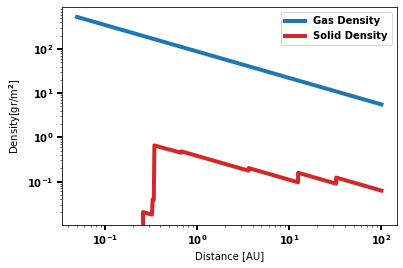

In [7]:
#GAs solid density and gas density
fig, ax1 = plt.subplots()
#gas density
color = 'tab:blue'
ax1.plot(r0/var.au, dg0/10 ,color=color, label = r'Gas Density', linewidth = 4.0)

#Dust density
color = 'tab:red'
ax1.plot(r0/var.au, ds0/10,color=color,label = r'Solid Density', linewidth = 4.0)

#axis
ax1.tick_params(size=5,width=2)
ax1.set_xlabel(r'Distance [AU]')
ax1.set_ylabel(r'Density[gr/m$^2$]')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

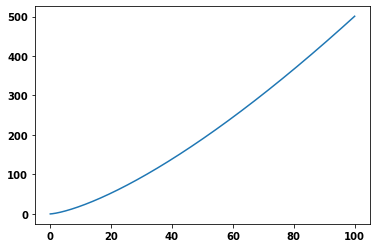

In [9]:
plt.plot(r0/var.au, 2*dg0/10*r0**2/5e24)

In [4]:
#dtg
fig, ax1 = plt.subplots()



color = 'tab:blue'
ax1.plot(r0/var.au, dtg0 ,color=color, linewidth = 4.0)

ax1.tick_params(size=5,width=2)
ax1.set_xlabel(r'Distance [AU]')
ax1.set_ylabel(r'Dust to Gas Ratio')
plt.xscale('log')
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


In [9]:
#%matplotlib qt
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()



plt.tick_params(size=5,width=2)
x = r
y = dtg
z = ["%.1f" % z for z in T]
ax1.set_xlim(r[0],r[-1])

ax1.step(x,y,where = 'post',linewidth=3.0)
ax1.set_xlabel(r'Distance[AU]')
ax1.set_ylabel('rDust to Gas Ratio')
ax1.set_xscale('log')
plt.xscale('log')

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(x)
ax2.set_xticklabels(z)
ax2.set_xlabel(r'Temperature[K]')
#fig.tight_layout()
plt.show()

In [ ]:
#Temperature and density
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('distance (AU)')
ax1.set_ylabel('Temperature[K]')
ax1.plot(r0/var.au, T0, color=color)
ax1.set_ylim(1,2000)
plt.yscale('log')
#ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Gas Density')  # we already handled the x-label with ax1
ax2.plot(r0/var.au, dg0/10, color=color)
#ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(1,2000)
plt.yscale('log')
plt.xscale('log')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

pylab.rc('font', **font)

plt.tick_params(size=5,width=2)
x = T
y = dtg
z = ["%.1f" % z for z in r]
ax1.set_xlim(T[0],T[-1])

ax1.step(x,y,where = 'post',linewidth=3.0)

In [ ]:

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('distance (AU)')
ax1.set_ylabel('Temperature[K]')
ax1.scatter(r0/var.au, T0, color=color)
ax1.set_ylim(1,2000)
plt.yscale('log')
#ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Gas Density')  # we already handled the x-label with ax1
#ax2.step(r, dtg, color=color)
#ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim(1,2000)
#plt.yscale('log')
plt.xscale('log')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
#Set 1
r = np.arange(0.05,100.,0.05)*var.au
T = np.zeros_like(r)
for i in range(len(r)):
    T[i] = dsk.tempr(r[i]) 
print (len(r), len(T))

In [ ]:
com_s = np.zeros([len(T0),13])
com_g = np.zeros([len(T0),13])
#print com_s
for i in range(len(T)):
    chm.chem(T0[i])
    com_s[i] = chm.sld
    com_g[i] = chm.gas
    
mtl = np.zeros([len(T0),2])

for i in range(len(T)):
    mtl[i,0]=chm.metalicity_d(com_g[i])
    mtl[i,1]=chm.metalicity_d(com_s[i])

In [ ]:
print (dsk.dTg*d_g)
print (d_g)
print (T)
print (r/var.au)

In [ ]:
%matplotlib inline
plt.plot(mtl[:,0],com_s[:,3]/com_s[:,5],'b.')
plt.figure()
plt.plot(mtl[:,1],com_g[:,3]/com_g[:,5])

In [ ]:
import numpy as np

import matplotlib.pyplot as plt


xran = np.arange(0,100)
yran = xran**2

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.tick_params(direction='out', length=6, width=2, colors='k',
               grid_color='r', grid_alpha=0.5)
ax.plot(r/var.au,T, linewidth = 3)

plt.yscale('log')
plt.xscale('log')

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.tick_params(direction='out', length=6, width=2, colors='k',
               grid_color='r', grid_alpha=0.5)
ax.plot(r/var.au,T, linewidth = 3)
ax.set_title('test')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.yscale('log')
plt.xscale('log')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:

import numpy as np

import matplotlib.pyplot as plt


xran = np.arange(0,100)
yran = xran**2


plt.plot(xran,yran)
plt.tick_params(size=20,width=20)

In [ ]:
#%matplotlib qt
plt.figure()
plt.plot(r/var.au,T,linewidth=3.0)
plt.plot(r/var.au,d_g/10,linewidth=3.0)
plt.yscale('log')
plt.xscale('log')
plt.tick_params(size=5,width=2)


plt.figure()
plt.plot(T,d_g/10,linewidth=3.0)
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.tick_params(size=5,width=2)

plt.figure()
plt.plot(T,d_s/10,linewidth=3.0)
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.tick_params(size=5,width=2)

#plt.figure()
#plt.plot(r/var.au,d_g,linewidth=3.0)
#plt.yscale('log')
#plt.xscale('log')

plt.figure()
plt.plot(r/var.au,d_s/10,linewidth=3.0)
plt.yscale('log')
plt.xscale('log')
plt.tick_params(size=5,width=2)


In [ ]:
plt.figure()
plt.plot(r/var.au,d_g)
#plt.yscale('log')
#plt.xscale('log')

In [ ]:
plt.figure()
plt.plot(r/var.au,d_s)
plt.yscale('log')
plt.xscale('log')

In [ ]:
d = d_g +d_s
plt.figure()
plt.plot(r/var.au,d)
plt.yscale('log')
plt.xscale('log')